# EMAIL SMS:SPAM FILTERING
## le but est de cree un model un utilisant le taritement des languages naturels (TAL ou NLP) 
## le travaille consist a classe les emails en mail interessant ham ou des mail inutil spam

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import nltk as nltk
import neattext as nt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
nltk.download('punkt')  # est tres important pour utiliser la tokenization

[nltk_data] Downloading package punkt to C:\Users\Muhammed
[nltk_data]     ehab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

In [5]:
df=pd.read_csv('C:\\Users\Muhammed ehab\\OneDrive - ESPRIT\\Bureau\\MO dataset\\spam_ham.csv',encoding='latin1')

In [6]:
pd.set_option('display.max_colwidth',100) # afficher les 100 premiere caracteres
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2121,ham,In xam hall boy asked girl Tell me the starting term for dis answer I can den manage on my own A...,NaN,NaN,NaN
5259,ham,Can help u swoop by picking u up from wherever ur other birds r meeting if u want.,NaN,NaN,NaN
2822,ham,Then u ask darren go n pick u lor... But i oso sian tmr haf 2 meet lect...,NaN,NaN,NaN


In [8]:
# supprimer les colones unitils
df.drop(columns=['Unnamed: 3','Unnamed: 4','Unnamed: 2'],inplace=True)

In [9]:
df.rename(columns={'v1':'type_de_message','v2':'le_message'},inplace=True)

In [10]:
df.sample(5)

,type_de_message,le_message
3482,ham,"Hello, my love! How goes that day ? I wish your well and fine babe and hope that you find some j..."
1148,ham,I'm not driving... Raining! Then i'll get caught at e mrt station lor.
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY
4106,spam,"HOT LIVE FANTASIES call now 08707500020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 08..."


In [11]:
df.shape

(5572, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type_de_message  5572 non-null   object
 1   le_message       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.isnull().sum()   # on a pas donc des valeurs manquants

type_de_message    0
le_message         0
dtype: int64

In [14]:
df.type_de_message.value_counts()

type_de_message
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='type_de_message'>

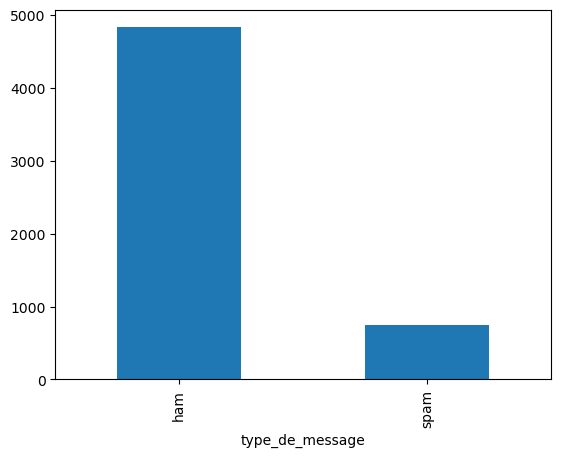

In [15]:
df.type_de_message.value_counts().plot(kind='bar')

In [16]:
df.le_message.value_counts()

le_message
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                           

In [17]:
# cree une autre copie de notre dataframe
df2=df.copy()

# DATA PREPARATION

# Spprimer les ponctuations

In [18]:
import string as str

In [19]:
str.punctuation  # voici les listes de ponctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
pon=str.punctuation

In [21]:
def suprimer_ponctuation(text):
    text_filtrer=''
    for x in text:
        if x not in pon:
            text_filtrer+=x
    return text_filtrer
            

In [22]:
text="bonjour c'est mo! je suis un etudiane en AI j'aime beacoup ce domaine est ce que vous me partage les meme sentiment?"

In [23]:
suprimer_ponctuation(text)

'bonjour cest mo je suis un etudiane en AI jaime beacoup ce domaine est ce que vous me partage les meme sentiment'

 le but dans le script suivant est cree une nouvelle collone dans notre data_frme qui s'appelle message_filtrer qui contient la colone
 message filtrer sans ponctuation

In [24]:
df['le_message_filtrer']=df['le_message'].apply(lambda var:suprimer_ponctuation(var.lower()))

In [25]:
df.head(3)

,type_de_message,le_message,le_message_filtrer
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...


# TOKENIZATION

In [26]:
from nltk.tokenize import word_tokenize

In [27]:
import re  #   regulae expression module pour manipuler les chaines ds caracteres et les texts

In [28]:
text="j'aime la programation! et bien sur le #NLP et la ML, et DL ."
token_text=re.split(' ',text) # il va diviser le text selon les espaces
token_text

["j'aime",
 'la',
 'programation!',
 'et',
 'bien',
 'sur',
 'le',
 '#NLP',
 'et',
 'la',
 'ML,',
 'et',
 'DL',
 '.']

In [29]:
def tokenize(text):
    token=word_tokenize(text)
    return token

In [30]:
df['le_message_filtrer']=df['le_message_filtrer'].apply(lambda x:tokenize(x)) # tokenization du message filtre

In [31]:
df

,type_de_message,le_message,le_message_filtrer
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is eas...,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u, u, have, won, the, å£750, pound, priz..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[will, ì, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other suggestions?","[pity, was, in, mood, for, that, soany, other, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,"[the, guy, did, some, bitching, but, i, acted, like, id, be, interested, in, buying, something, ..."


In [32]:
# pour enlever les crochets du liste
def eliminer_letype_liste(colone):
    if isinstance(colone,list):
        colone=' '.join(colone)
    return colone

In [33]:
df['le_message_filtrer']=df['le_message_filtrer'].apply(lambda x:eliminer_letype_liste(x))
df.sample(3)

,type_de_message,le_message,le_message_filtrer
2904,ham,"Ha. You donÛ÷t know either. I did a a clever but simple thing with pears the other day, perfect...",ha you donû÷t know either i did a a clever but simple thing with pears the other day perfect fo...
503,ham,Lolnice. I went from a fish to ..water.?,lolnice i went from a fish to water
2881,ham,Hi Harish's rent has been transfred to ur Acnt.,hi harishs rent has been transfred to ur acnt


# Rmoving stop words

In [34]:
nltk.download('stopwords')  # tres important pour pourrez utiliser les stopwords

[nltk_data] Downloading package stopwords to C:\Users\Muhammed
[nltk_data]     ehab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

In [36]:
stopword_EN=stopwords.words('english')
stopword_FR=stopwords.words('french')
stopword_AR=stopwords.words('arabic')

In [37]:
stopword_EN

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
stopword_FR

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [39]:
stopword_AR

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [40]:
# il faut faire attentiin en manipulant les stopwords

In [41]:
def suprimer_stop_words(text):
    text_without_stop_words=''
    for x in text:
        if x not in stopword_FR:
            text_without_stop_words+=x
    return text_without_stop_words


In [42]:
text1="bonjour a tous je m'appelle mo ehab depuis j'ai 24 ans je vais chaque jours a ESPRIT "

In [43]:
suprimer_stop_words(text1)  # comme vous voyez le phrase est devenue sans aucune sens


"boour a ou e 'appee o ehab epui 'ai 24 a e vai haque our a ESPRIT "

In [44]:
# essayons un peux d'ameliorer notre liste des stopwords
def eliminer_les_seuls_letres(stop_words):
    nouv_list_pon=[]
    for x in stop_words:
        if len(x)>1:
            nouv_list_pon.append(x)
    return nouv_list_pon      

In [45]:
stop_fr=eliminer_les_seuls_letres(stopword_FR)
stop_fr.append(' a ')   # sera tres util a ajouter a dans notre list filtre
stop_fr

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'eu',
 'eue',
 'eues',
 'eus',
 'ai',
 'as',
 'a

In [46]:
# redefinissons maintenant la fonction suprimer_stop_words
def suprimer_stop_words_fr(text):
    text_sans_stop_words=[]
    nouv_text=text.split()
    for x in nouv_text:
        if x not in stop_fr:
            text_sans_stop_words.append(x)
    var=' '.join(text_sans_stop_words)   
    # join utiliser pour conactener les element de types string d'une listeen une chaine 
    return var

In [47]:
text1="bonjour a tous je m'appelle mo ehab depuis j'ai 24 ans j'etud a esprit et j'aime mon universite  "
suprimer_stop_words_fr(text1)

"bonjour a tous m'appelle mo ehab depuis j'ai 24 ans j'etud a esprit j'aime universite"

In [48]:
def delete_stop_words(text):
    text_without_stop_words=''
    for x in text:
        if x not in stopword_EN:
            text_without_stop_words+=x
    return text_without_stop_words

In [49]:
text2="hello my name is mo my level in english is not up for that i try every day to learn new things"

In [50]:
delete_stop_words(text2)

'hell  ne    level n englh  n up fr h  r ever   lern new hng'

In [51]:
stop_en=eliminer_les_seuls_letres(stopword_EN)
stop_en

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 

In [52]:
# la meme chose est rencontre aussi avec anglais
def delete_stop_words2(text):
    if isinstance(text, object):
        nouv_text=text.split()   # est tres util a diviser le text en mots en cas le text est une chaine
    else:
        nouv_text=text
    text_without_stop_words=''
    for x in nouv_text:
        if x not in stop_en:
            text_without_stop_words+=' '+ x
    return text_without_stop_words

In [53]:
delete_stop_words2(text2)

' hello name mo level english i try every day learn new things'

In [54]:
df.sample(2)

,type_de_message,le_message,le_message_filtrer
321,ham,Hey... Why dont we just go watch x men and have lunch... Haha,hey why dont we just go watch x men and have lunch haha
4174,ham,How are you doing. How's the queen. Are you going for the royal wedding,how are you doing hows the queen are you going for the royal wedding


In [55]:
df['le_message_sans_stopwords']=df['le_message_filtrer'].apply(lambda var:delete_stop_words2(var))
df.sample(3)

,type_de_message,le_message,le_message_filtrer,le_message_sans_stopwords
2359,spam,"Spook up your mob with a Halloween collection of a logo & pic message plus a free eerie tone, tx...",spook up your mob with a halloween collection of a logo pic message plus a free eerie tone txt c...,spook mob a halloween collection a logo pic message plus a free eerie tone txt card spook 8007 ...
66,ham,"Today is \song dedicated day..\"" Which song will u dedicate for me? Send this to all ur valuable...",today is song dedicated day which song will u dedicate for me send this to all ur valuable frnds...,today song dedicated day song u dedicate send ur valuable frnds first rply
5355,ham,Living is very simple.. Loving is also simple.. Laughing is too simple.. Winning is tooo simple....,living is very simple loving is also simple laughing is too simple winning is tooo simple but be...,living simple loving also simple laughing simple winning tooo simple simple difficult


In [56]:
pd.set_option('display.max_rows',100)
df.sample(3)

,type_de_message,le_message,le_message_filtrer,le_message_sans_stopwords
1224,spam,You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights i...,you are a winner u have been specially selected 2 receive å£1000 cash or a 4 holiday flights inc...,a winner u specially selected 2 receive å£1000 cash a 4 holiday flights inc speak a live operat...
1099,ham,Been up to ne thing interesting. Did you have a good birthday? When are u wrking nxt? I started ...,been up to ne thing interesting did you have a good birthday when are u wrking nxt i started uni...,ne thing interesting a good birthday u wrking nxt i started uni today
5364,spam,Call 09095350301 and send our girls into erotic ecstacy. Just 60p/min. To stop texts call 087124...,call 09095350301 and send our girls into erotic ecstacy just 60pmin to stop texts call 087124603...,call 09095350301 send girls erotic ecstacy 60pmin stop texts call 08712460324 nat rate


# STEMING

# souvent nous rncontrons deux types de problemes tres courant avec le steming
under steming
over steming

## le stemming n'utilise pas un dictionnaire  il utilise un algorithm predefinie

In [57]:
ps=nltk.PorterStemmer()  

In [58]:
dir(ps)  # pour voir les fonctions qu'il contient

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [59]:
print(ps.stem('play'))
print(ps.stem('player'))
print(ps.stem('playing'))
print(ps.stem('played'))

play
player
play
play


## exemple du oversteming

In [60]:
# il rend des mots qui ont differnt sens a une seul origine
print(ps.stem('universe'))
print(ps.stem('universal'))
print(ps.stem('university'))

univers
univers
univers


## exemple du understeming

In [61]:
# il rend des mots qui ont le meme sens a des differents origines
print(ps.stem('alumnus'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumnu
alumni
alumna


In [62]:
def steaming(text):
    text_steam=[]
    text=text.split()
    for x in text:
        text_steam.append(ps.stem(x))
    text_steam= ' '.join(text_steam)
    return text_steam

In [63]:
df['message_steming']=df['le_message_sans_stopwords'].apply(lambda x:steaming(x))

In [64]:
df.sample(3)

,type_de_message,le_message,le_message_filtrer,le_message_sans_stopwords,message_steming
4378,ham,How are you. Just checking up on you,how are you just checking up on you,checking,check
2930,ham,Hi' Test on &lt;#&gt; rd ....,hi test on ltgt rd,hi test ltgt rd,hi test ltgt rd
3544,ham,Thank You meet you monday,thank you meet you monday,thank meet monday,thank meet monday


# LEMMATIZATION

##  par contre de la steming le lemitazition utilise un dictionnaire donc c'est lent mais plus performant

In [65]:
nltk.download('wordnet')  

[nltk_data] Downloading package wordnet to C:\Users\Muhammed
[nltk_data]     ehab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
wnl=nltk.WordNetLemmatizer()

In [67]:
dir(wnl)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [68]:
# aapliquons sur les meme exemples vu stemming 

In [69]:
print(wnl.lemmatize('universe'))
print(wnl.lemmatize('universal'))
print(wnl.lemmatize('university'))  
# on peut remarque qu'il a pris du  temps car il va consulter son dictionnaire mais le resultats sont parfait 

universe
universal
university


In [70]:
print(wnl.lemmatize('alumnus'))
print(wnl.lemmatize('alumni'))
print(wnl.lemmatize('alumnae')) 
# on remarque qu'il a bien donner les 2 premieres mots par contre la 3eme ce qui est explique par l'abscence de ce mot dans le dictionnaire

alumnus
alumnus
alumna


In [71]:
def lemmmatizer(text):
    text_lemmatizer=[]
    text=text.split()
    for x in text:
        text_lemmatizer.append(wnl.lemmatize(x))
    text_lemmatizer= ' '.join(text_lemmatizer)
    return text_lemmatizer
        

In [72]:
df['message_lemmatizer']=df['le_message_sans_stopwords'].apply( lambda x:lemmmatizer(x))

In [73]:
df.sample(4)

,type_de_message,le_message,le_message_filtrer,le_message_sans_stopwords,message_steming,message_lemmatizer
5152,ham,Idk. I'm sitting here in a stop and shop parking lot right now bawling my eyes out because i fee...,idk im sitting here in a stop and shop parking lot right now bawling my eyes out because i feel ...,idk im sitting a stop shop parking lot right bawling eyes i feel like im a failure everything n...,idk im sit a stop shop park lot right bawl eye i feel like im a failur everyth nobodi want i fee...,idk im sitting a stop shop parking lot right bawling eye i feel like im a failure everything nob...
4747,ham,The beauty of life is in next second.. which hides thousands of secrets. I wish every second wil...,the beauty of life is in next second which hides thousands of secrets i wish every second will b...,beauty life next second hides thousands secrets i wish every second wonderful ur life gud n8,beauti life next second hide thousand secret i wish everi second wonder ur life gud n8,beauty life next second hide thousand secret i wish every second wonderful ur life gud n8
5334,ham,"Garbage bags, eggs, jam, bread, hannaford wheat chex",garbage bags eggs jam bread hannaford wheat chex,garbage bags eggs jam bread hannaford wheat chex,garbag bag egg jam bread hannaford wheat chex,garbage bag egg jam bread hannaford wheat chex
2806,spam,December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera m...,december only had your mobile 11mths you are entitled to update to the latest colour camera mobi...,december mobile 11mths entitled update latest colour camera mobile free call mobile update co f...,decemb mobil 11mth entitl updat latest colour camera mobil free call mobil updat co free 0800298...,december mobile 11mths entitled update latest colour camera mobile free call mobile update co fr...


In [74]:
# donc coisissons une seul methode pour filtrer un peu nottre df et je choix le steming
df=df[['type_de_message','le_message','message_steming']]
df.sample(3)

,type_de_message,le_message,message_steming
559,ham,"Aiyo... U always c our ex one... I dunno abt mei, she haven reply... First time u reply so fast....",aiyo u alway c ex one i dunno abt mei repli first time u repli fast y lucki workin huh got bao u...
2076,ham,"Trust me. Even if isn't there, its there.",trust even isnt
1889,ham,I gotta collect da car at 6 lei.,i got ta collect da car 6 lei


# VECTORIZATION

## LE VECTORIZATION EST UNE TECHNIQUE SERT A CONVERTIR LES TEXTS EN ENSEMBLES DES VALEURS NUMERIQUES

In [75]:
# testons les differnts techniques de vectorization avec la lidte suivant
l=['je suis un data scientist','data science','je suis un espritiens','AI','ML est une sous domaine de AI']

## COUNT VECCTORIZATION

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
vect=CountVectorizer()
liste_vectorise=vect.fit_transform(l)

In [78]:
liste_vectorise.shape

(5, 14)

In [79]:
print(liste_vectorise)

  (0, 6)	1
  (0, 11)	1
  (0, 12)	1
  (0, 1)	1
  (0, 9)	1
  (1, 1)	1
  (1, 8)	1
  (2, 6)	1
  (2, 11)	1
  (2, 12)	1
  (2, 4)	1
  (3, 0)	1
  (4, 0)	1
  (4, 7)	1
  (4, 5)	1
  (4, 13)	1
  (4, 10)	1
  (4, 3)	1
  (4, 2)	1


In [80]:
sparse_matrix=pd.DataFrame(liste_vectorise.toarray())
sparse_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [81]:
sparse_matrix.columns=vect.get_feature_names_out()

In [82]:
sparse_matrix

,ai,data,de,domaine,espritiens,est,je,ml,science,scientist,sous,suis,un,une
0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,1,0,1,0,0,1,0,0,1


## vectorizing N-grames

In [83]:
ngram_vect=CountVectorizer(ngram_range=(1,1))
liste_ngram_vectorise=ngram_vect.fit_transform(l)
sparse_matrix=pd.DataFrame(liste_ngram_vectorise.toarray())
sparse_matrix.columns=ngram_vect.get_feature_names_out()
sparse_matrix       # donc les memes resultats car on choisi le n_gram=1

,ai,data,de,domaine,espritiens,est,je,ml,science,scientist,sous,suis,un,une
0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [84]:
pd.set_option('display.max_columns',27)  # pour afficher tous les colones dans df

In [85]:
# changeons maintenant le n_gram
ngram_vect=CountVectorizer(ngram_range=(1,2))
liste_ngram_vectorise=ngram_vect.fit_transform(l)
sparse_matrix=pd.DataFrame(liste_ngram_vectorise.toarray())
sparse_matrix.columns=ngram_vect.get_feature_names_out()
sparse_matrix 

,ai,data,data science,data scientist,de,de ai,domaine,domaine de,espritiens,est,est une,je,je suis,ml,ml est,science,scientist,sous,sous domaine,suis,suis un,un,un data,un espritiens,une,une sous
0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1


In [86]:
ngram_vect.get_feature_names_out()

array(['ai', 'data', 'data science', 'data scientist', 'de', 'de ai',
       'domaine', 'domaine de', 'espritiens', 'est', 'est une', 'je',
       'je suis', 'ml', 'ml est', 'science', 'scientist', 'sous',
       'sous domaine', 'suis', 'suis un', 'un', 'un data',
       'un espritiens', 'une', 'une sous'], dtype=object)

# TF-IDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tfidf=TfidfVectorizer()
liste_tfidf=tfidf.fit_transform(l)
sparse_matrix=pd.DataFrame(liste_tfidf.toarray())
sparse_matrix.columns=tfidf.get_feature_names_out()
sparse_matrix 

,ai,data,de,domaine,espritiens,est,je,ml,science,scientist,sous,suis,un,une
0,0.00000,0.425001,0.000000,0.000000,0.000000,0.000000,0.425001,0.000000,0.000000,0.526778,0.000000,0.425001,0.425001,0.000000
1,0.00000,0.627914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778283,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.581951,0.000000,0.469515,0.000000,0.000000,0.000000,0.000000,0.469515,0.469515,0.000000
3,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.31284,0.000000,0.387757,0.387757,0.000000,0.387757,0.000000,0.387757,0.000000,0.000000,0.387757,0.000000,0.000000,0.387757


# APPLIQUONS LES MEME TECHNIQUES SUR NOTRE DATA df

In [89]:
df_vectorise=vect.fit_transform(df['message_steming'])
sparse_matrix=pd.DataFrame(df_vectorise.toarray())
sparse_matrix.columns=vect.get_feature_names_out()
sparse_matrix

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,...,åômorrow,åôrent,ìll,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
ngram_vect=CountVectorizer(ngram_range=(1,2))
df_ngram_vectorise=ngram_vect.fit_transform(df['message_steming'])
sparse_matrix=pd.DataFrame(df_ngram_vectorise.toarray())
sparse_matrix.columns=ngram_vect.get_feature_names_out()
sparse_matrix 

,008704050406,008704050406 sp,0089mi,0089mi last,0121,0121 2025050,01223585236,01223585236 xx,01223585334,01223585334 cum,0125698789,0125698789 ring,02,...,ûïharri potter,ûò,ûò address,ûò entertain,ûò even,ûò favour,ûò get,ûò hope,ûò inde,ûò limp,ûò sound,ûówel,ûówel done
0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
df_tfidf=tfidf.fit_transform(df['message_steming'])
sparse_matrixtfidf=pd.DataFrame(df_tfidf.toarray())
sparse_matrixtfidf.columns=tfidf.get_feature_names_out()
sparse_matrixtfidf

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,...,åômorrow,åôrent,ìll,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# FEATURES-ENGINEERING

## posons ds hypotheses et tester ces leurs verites 


In [92]:
# HYPOTHESE 1 : en generales les messges tres long ou tres courts sont des spams
# cree une colone qui contient le longueur du message
df['longueur']=df['le_message'].apply( lambda x:len(x)-x.count(' '))
df.sample(3)

,type_de_message,le_message,message_steming,longueur
828,ham,"Sorry light turned green, I meant another friend wanted &lt;#&gt; worth but he may not be around",sorri light turn green i meant anoth friend want ltgt worth may around,80
4408,spam,"For your chance to WIN a FREE Bluetooth Headset then simply reply back with \ADP\""""",chanc win a free bluetooth headset simpli repli back adp,69
1909,ham,Then u going ikea str aft dat?,u go ikea str aft dat,24


In [93]:
les_longueurs=df.longueur.value_counts().values
les_longueurs.sort()
les_longueurs

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   4,   4,   4,   5,   5,   5,   5,   6,
         6,   6,   6,   7,   7,   8,   8,   9,   9,  10,  11,  11,  12,
        12,  12,  13,  13,  13,  13,  14,  14,  14,  15,  16,  17,  17,
        17,  17,  18,  18,  18,  18,  18,  19,  19,  19,  19,  19,  20,
        20,  20,  21,  21,  22,  22,  22,  22,  22,  22,  23,  23,  23,
        23,  23,  23,  24,  24,  25,  25,  26,  27,  27,  27,  27,  28,
        29,  30,  31,  31,  31,  31,  31,  31,  31,  32,  32,  32,  33,
        34,  34,  35,  35,  35,  35,  35,  36,  36,  36,  37,  3

In [94]:
# HYPOTHESE 2 : les mesaages qui contient plusieurs signes de ponctuation sont des spam
# creeons une colone qui contient les les nombre de signes de ponctuation
# definisson une fonction qui calcule le nombre des signes de ponctuation
def calcul_ponc(text):
    s=0
    lon=len(text)
    for x in text:
        if x in str.punctuation:
            s+=1
    return s/lon   # biensur le 
    
df['lon_ponc']=df['le_message'].apply(lambda x: calcul_ponc(x))

In [95]:
df.sample(4)

,type_de_message,le_message,message_steming,longueur,lon_ponc
3096,ham,"Yo, you at jp and hungry like a mofo?",yo jp hungri like a mofo,29,0.054054
5322,ham,"Thanks, I'll keep that in mind",thank ill keep mind,25,0.066667
2124,ham,Beautiful Truth against Gravity.. Read carefully: \Our heart feels light when someone is in it.....,beauti truth graviti read care heart feel light someon feel heavi someon leav good night,134,0.069182
4883,ham,For many things its an antibiotic and it can be used for chest abdomen and gynae infections even...,mani thing antibiot use chest abdomen gyna infect even bone infect,94,0.008850


In [96]:
df.lon_ponc.value_counts()

lon_ponc
0.000000    468
0.090909     78
0.043478     71
0.041667     68
0.045455     63
           ... 
0.030864      1
0.028796      1
0.051095      1
0.016216      1
0.008000      1
Name: count, Length: 994, dtype: int64

In [101]:
# HYPOTHESE 3 : les messages spam contient plusieurs letre majuscules
def count_maj(text):
    lon=len(text)
    s=0
    for x in text:
        if x.isupper():
            s+=1
    return s/lon

In [102]:
df['nbr_maj']=df['le_message'].apply(lambda x: count_maj(x))

In [103]:
df.sample(2)

,type_de_message,le_message,message_steming,longueur,lon_ponc,nbr_maj
653,ham,Fine i miss you very much.,fine i miss much,21,0.038462,0.038462
884,ham,Yoyyooo u know how to change permissions for a drive in mac. My usb flash drive,yoyyooo u know chang permiss a drive mac usb flash drive,64,0.012658,0.025316


In [104]:
df.describe()

,longueur,lon_ponc,nbr_maj
count,5572.000000,5572.000000,5572.000000
mean,65.512024,0.059797,0.066374
std,48.629795,0.058587,0.109094
min,2.000000,0.000000,0.000000
25%,29.000000,0.026846,0.025974
50%,50.000000,0.045455,0.038462
75%,98.000000,0.076923,0.062500
max,740.000000,0.857143,1.000000


# RESCALING THE FEATURES

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler=MinMaxScaler()

In [117]:
df[['nbr_maj','lon_ponc','longueur']]=scaler.fit_transform(df[['nbr_maj','lon_ponc','longueur']])

In [118]:
df.sample(3)

,type_de_message,le_message,message_steming,longueur,lon_ponc,nbr_maj
4409,ham,You also didnt get na hi hi hi hi hi,also didnt get na hi hi hi hi hi,0.033875,0.000000,0.027778
3933,ham,How come guoyang go n tell her? Then u told her?,come guoyang go n tell u told,0.048780,0.048611,0.041667
5153,ham,Haven't left yet so probably gonna be here til dinner,havent left yet probabl gon na til dinner,0.056911,0.022013,0.018868


In [119]:
df.shape

(5572, 6)

In [131]:
sparse_matrixtfidf.shape

(5572, 8034)

In [132]:
sparse_matrixtfidf.sample(3)

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,...,åômorrow,åôrent,ìll,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
4473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386212,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.236311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING

In [136]:
X=pd.concat([df['lon_ponc'],df['nbr_maj'],df['longueur'],sparse_matrixtfidf],axis=1)

In [137]:
X.sample(3)

,lon_ponc,nbr_maj,longueur,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,åômorrow,åôrent,ìll,ìï,ìïll,ûthank,ûªm,ûªt,ûªv,ûï,ûïharri,ûò,ûówel
5038,0.011905,0.010204,0.102981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.000000,0.035714,0.028455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892,0.131720,0.112903,0.070461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
Y=df['type_de_message']

In [139]:
Y.sample(3)

4122     ham
2327    spam
2734     ham
Name: type_de_message, dtype: object

### petit definission de notre algorithme utiliser RANDOMFOREST

Le Random Forest (forêt aléatoire) est un algorithme d'apprentissage automatique utilisé pour la classification et la régression. Il fonctionne en combinant plusieurs arbres de décision, chacun étant entraîné sur un échantillon aléatoire des données d'entraînement. Les prédictions des arbres sont ensuite combinées par vote majoritaire (classification) ou moyenne (régression).

Points Clés
Ensemble de modèles : Utilise plusieurs arbres de décision pour améliorer précision et robustesse.
Bagging : Les arbres sont entraînés sur des échantillons aléatoires avec remise, réduisant la variance.
Sélection aléatoire des features : Chaque nœud d'arbre utilise un sous-ensemble aléatoire de features, augmentant la diversité.
Avantages
Réduction du surapprentissage : Moins sujet au surapprentissage par rapport à un arbre unique.
Haute précision : Souvent très précis avec peu de réglages de paramètres.
Flexibilité : Applicable à la classification et à la régression.
Inconvénients
Complexité : Exigeant en calcul et en mémoire.
Interprétabilité réduite : Difficile à interpréter en raison des nombreux arbres.
Applications
Diagnostic médical
Finance
Marketing
Le Random Forest est une technique puissante et flexible, offrant une bonne précision et résistant au surapprentissage, malgré une interprétabilité limitée

In [140]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.22)
X_train.shape,X_test.shape ,Y_train.shape,Y_test.shape

((4346, 8037), (1226, 8037), (4346,), (1226,))

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=100)  # n_jobs accelere l'execution au lieu d'etre sequentiel elle sera simultanement

In [162]:
dir(RandomForestClassifier)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mim

In [163]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [164]:
model.score(X_test,Y_test)

0.9690048939641109

## chexking the importances features

In [168]:
sorted(zip(model.feature_importances_,X_train.columns),reverse=True)[0:15]

[(0.04645547746039599, 'longueur'),
 (0.03705510924216261, 'txt'),
 (0.03649356619079401, 'nbr_maj'),
 (0.026566527925146573, 'call'),
 (0.01910805711334825, 'mobil'),
 (0.017312911785262654, 'claim'),
 (0.01689745387755963, 'servic'),
 (0.015707766306149465, 'free'),
 (0.014504392560086508, 'repli'),
 (0.013616498549869205, 'text'),
 (0.012586372664246948, 'stop'),
 (0.01159164405482996, '500'),
 (0.010662324234391922, 'prize'),
 (0.009541291425362634, 'lon_ponc'),
 (0.009174850827780212, 'win')]

# MODEL EVALUATION

## utiliser le randomforestclassifier avec cross-validation

In [173]:
from sklearn.model_selection import KFold ,cross_val_score

In [176]:
kf=KFold(n_splits=5)

In [177]:
cross_val_score(model,X_train,Y_train,cv=kf,scoring='accuracy',n_jobs=-1)

array([0.97586207, 0.9712313 , 0.97698504, 0.97583429, 0.9735328 ])

## accuracy et confusion matrix

In [ ]:
accuracy=model.score()

In [178]:
from sklearn.metrics import confusion_matrix

In [182]:
Y_pred=model.predict(X_test)
con_mat=confusion_matrix(Y_test,Y_pred)
con_mat  # attetion en sckit-learn la confusion matrix est different en les srs sur net  est classe comme ci dessus
# TN        FP
# FN        TP

array([[1062,    0],
       [   7,  157]], dtype=int64)